<a href="https://colab.research.google.com/github/shishir-py/ml-projects/blob/main/Feature_Imputation_with_a_Heat_Flux_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loding Data

In [ ]:
data_path="/content/drive/MyDrive/Proj/kaggle competation/data.csv"
sub_path="/content/drive/MyDrive/Proj/kaggle competation/sample_submission.csv"

In [ ]:
df=pd.read_csv(data_path)

In [ ]:
df.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


# Data info
## Here's a brief explanation of each column:

  Index: This column represents a unique identifier for each observation in the table.

  Id: This column may represent an additional identifier for each observation. It's not clear from the limited information provided what this column refers to specifically.

  Author: This column may represent the name of the researcher or research team who conducted the experiment or collected the data.

  Geometry: This column represents the type of geometry used in the experiment, such as a tube or annulus.

  Pressure [MPa]: This column represents the pressure of the fluid in the experiment, measured in megapascals.

  Mass_flux [kg/m2-s]: This column represents the mass flux of the fluid in the experiment, measured in kilograms per square meter per second.

  X_e_out [-]: This column represents a variable related to the exit quality of the fluid in the experiment. It's not clear from the limited information provided what this variable specifically refers to.

  D_e [mm]: This column represents the equivalent diameter of the experimental geometry, measured in millimeters.

  D_h [mm]: This column represents the hydraulic diameter of the experimental geometry, measured in millimeters.

  Length [mm]: This column represents the length of the experimental geometry, measured in millimeters.

  Chf_exp [MW/m2]: This column represents the experimental critical heat flux, measured in megawatts per square meter.

# Examine the dataset for any missing values and understand the distribution of the features in the dataset

In [ ]:
df.shape

(31644, 10)

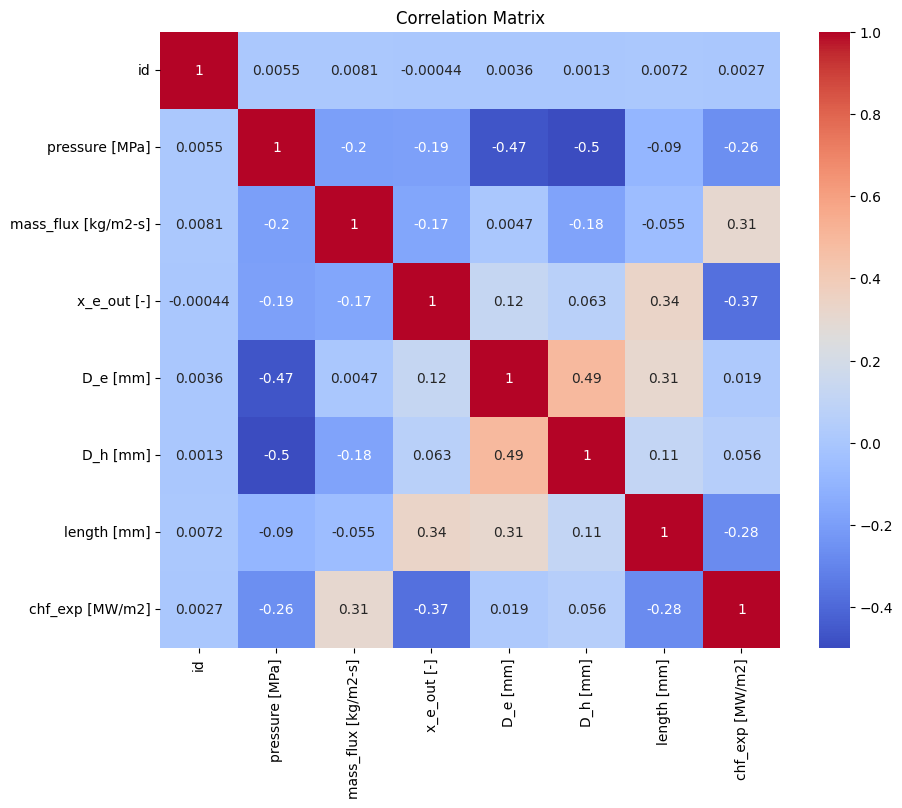

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Examine the dataset for missing values
print(df.isnull().sum())



id                         0
author                  5024
geometry                5500
pressure [MPa]          4452
mass_flux [kg/m2-s]     4791
x_e_out [-]            10415
D_e [mm]                5488
D_h [mm]                4589
length [mm]             4759
chf_exp [MW/m2]            0
dtype: int64


In [ ]:
# Get the summary statistics of the dataset
print(df.describe())

# Get the frequency distribution of categorical variables
print(df['author'].value_counts())


                 id  pressure [MPa]  mass_flux [kg/m2-s]   x_e_out [-]  \
count  31644.000000    27192.000000         26853.000000  21229.000000   
mean   15821.500000       10.640747          3068.011023     -0.000453   
std     9134.980296        4.333683          1777.032080      0.100911   
min        0.000000        0.100000             0.000000     -0.866700   
25%     7910.750000        6.890000          1519.000000     -0.046600   
50%    15821.500000       11.070000          2731.000000      0.003800   
75%    23732.250000       13.790000          4069.000000      0.064800   
max    31643.000000       20.680000          7975.000000      0.232000   

           D_e [mm]      D_h [mm]   length [mm]  chf_exp [MW/m2]  
count  26156.000000  27055.000000  26885.000000     31644.000000  
mean       8.629255     14.174330    832.987391         3.796985  
std        5.185692     19.838489    672.299239         1.983991  
min        1.000000      1.000000     10.000000         0.800000 

In [ ]:
# Group the data by author and geometry, and count the occurrences
grouped = df.groupby(['author', 'geometry']).size().reset_index(name='count')

# Display the results
print(grouped)
print(df['author'].unique())

          author geometry  count
0           Beus  annulus   1308
1           Beus     tube     29
2        Inasaka    plate      1
3        Inasaka     tube     34
4        Janssen  annulus   2247
5        Janssen    plate      1
6        Janssen     tube     31
7     Kossolapov  annulus      1
8     Kossolapov    plate     82
9     Kossolapov     tube      3
10     Mortimore  annulus    152
11     Mortimore    plate      2
12     Mortimore     tube      6
13        Peskov  annulus      1
14        Peskov    plate      3
15        Peskov     tube    872
16  Richenderfer  annulus      6
17  Richenderfer    plate    408
18  Richenderfer     tube     35
19      Thompson  annulus      9
20      Thompson    plate     11
21      Thompson     tube  14324
22   Weatherhead  annulus      1
23   Weatherhead     tube   1698
24      Williams  annulus      1
25      Williams    plate      1
26      Williams     tube    719
['Thompson' 'Beus' nan 'Peskov' 'Janssen' 'Weatherhead' 'Inasaka'
 'Williams

In [ ]:
# Print the rows where both "author" and "geometry" are NaN
print(len(df[(df["author"].isnull()) & (df["geometry"].isnull())]))

866


In [ ]:
data=df.copy()
# only rows where both author and geometry are NaN values will be dropped
data.dropna(subset=['author', 'geometry'], how='all', inplace=True)
#now replacing the rest nan values with 'unknown'
data[['author', 'geometry']] = df[['author', 'geometry']].fillna('Unknown')



In [ ]:
# This will fill the missing values in "pressure" and max flux  column with the mean of the respective "geometry" group
data['pressure [MPa]'] = data.groupby('geometry')['pressure [MPa]'].apply(lambda x: x.fillna(x.mean()))
data['mass_flux [kg/m2-s]'] = data.groupby('geometry')['mass_flux [kg/m2-s]'].apply(lambda x: x.fillna(x.mean()))
data['D_e [mm]'] = data.groupby('geometry')['D_e [mm]'].apply(lambda x: x.fillna(x.mean()))
data['D_h [mm]'] = data.groupby('geometry')['D_h [mm]'].apply(lambda x: x.fillna(x.mean()))
data['length [mm]'] = data.groupby('geometry')['length [mm]'].apply(lambda x: x.fillna(x.mean()))





In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("\nMissing Values Percentage:\n", missing_percentage)
# missing_values


Missing Values Percentage:
 id                      0.000000
author                  0.000000
geometry                0.000000
pressure [MPa]          0.000000
mass_flux [kg/m2-s]     0.000000
x_e_out [-]            32.968354
D_e [mm]                0.000000
D_h [mm]                0.000000
length [mm]             0.000000
chf_exp [MW/m2]         0.000000
dtype: float64


x_e_out has a negative correlation with pressure and mass_flux, and a positive correlation with length. D_e and D_h have a moderate positive correlation with each other and length has a moderate positive correlation with x_e_out. chf_exp has a moderate negative correlation with x_e_out.

In [ ]:
data.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.000000,3770.0,0.1754,8.406165,10.8,432.0,3.6
1,1,Thompson,tube,11.163435,6049.0,-0.0416,10.300000,10.3,762.0,6.2
2,2,Thompson,Unknown,13.790000,2034.0,0.0335,7.700000,7.7,457.0,2.5
3,3,Beus,annulus,13.790000,3679.0,-0.0279,5.600000,15.2,2134.0,3.0
4,4,Unknown,tube,13.790000,686.0,NaN,11.100000,11.1,457.0,2.8


# splitting the data in two set

In [ ]:
# Split the data into two sets based on the presence of missing values in the target column
df_missing = data[data['x_e_out [-]'].isnull()]
df_non_missing = data[~data['x_e_out [-]'].isnull()]


In [ ]:
df_test=df_missing.drop('x_e_out [-]', axis=1)
df_train=df_non_missing.drop('id', axis=1)

In [ ]:
df_train.shape

(20631, 9)

In [ ]:
df_train.isnull().sum()

author                 0
geometry               0
pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns to be encoded
cat_cols = ['author', 'geometry']

# Instantiate the encoder
encoder = OneHotEncoder()

# Fit and transform the training set
train_encoded = encoder.fit_transform(df_train[cat_cols])

# Transform the test set
test_encoded = encoder.transform(df_test[cat_cols])

# Get the encoded column names
encoded_cols = encoder.get_feature_names_out(cat_cols)

# Create new dataframes with the encoded columns
X_train_encoded_df = pd.DataFrame(train_encoded.toarray(), columns=encoded_cols)
X_test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=encoded_cols)
#resetting the index
df_train.reset_index(drop=True, inplace=True)
X_train_encoded_df.reset_index(drop=True, inplace=True)
df_encoded_train = pd.concat([df_train.drop(cat_cols, axis=1), X_train_encoded_df], axis=1)

df_test.reset_index(drop=True, inplace=True)
X_test_encoded_df.reset_index(drop=True, inplace=True)
df_encoded_test = pd.concat([df_test.drop(cat_cols, axis=1), X_test_encoded_df], axis=1)


# Modeling the data:

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
df=df_encoded_train
# Drop any rows with missing values in the target column
df = df.dropna(subset=['x_e_out [-]'])


# Split the data into training and testing sets
X = df.drop('x_e_out [-]', axis=1)
y = df['x_e_out [-]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")


Mean squared error: 0.01


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define the models
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR()
gb = GradientBoostingRegressor()

# Train the models
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions on the test set
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)
svm_preds = svm.predict(X_test)
gb_preds = gb.predict(X_test)

# Calculate the mean squared error for each model
dt_mse = mean_squared_error(y_test, dt_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
svm_mse = mean_squared_error(y_test, svm_preds)
gb_mse = mean_squared_error(y_test, gb_preds)

# Print the mean squared error for each model
print(f"Decision Tree MSE: {dt_mse}")
print(f"Random Forest MSE: {rf_mse}")
print(f"SVM MSE: {svm_mse}")
print(f"Gradient Boosting MSE: {gb_mse}")

Decision Tree MSE: 0.011716390764891331
Random Forest MSE: 0.006625418739123754
SVM MSE: 0.009092254933443638
Gradient Boosting MSE: 0.006182402190366584


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint as sp_randint

# Define the model
gb = GradientBoostingRegressor()

params = {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 8, 'max_features': 'log2'}

# Create a GradientBoostingRegressor object with the best hyperparameters
gbm = GradientBoostingRegressor(**params)
gbm.fit(X_train, y_train)
gbm_preds = gbm.predict(X_test)
gbm_mse = mean_squared_error(y_test, gbm_preds)
print(f"Gradient Boosting MSE: {gbm_mse}")



Gradient Boosting MSE: 0.00594223934801933


In [ ]:
prediction=gbm.predict(df_encoded_test.drop('id',axis=1))

In [ ]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": df_encoded_test["id"],
    "x_e_out [-]": prediction
})

# Save submission file to CSV format
submission_df.to_csv("submission.csv", index=False)

In [ ]:
pd.read_csv('submission.csv')

,id,x_e_out [-]
0,4,0.009539
1,7,-0.081706
2,10,-0.047053
3,12,-0.005600
4,23,0.042447
...,...,...
10142,31632,-0.082238
10143,31633,0.059746
10144,31634,-0.049013
10145,31637,0.021802
